## Observations and Insights 

In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [212]:
# Checking the number of mice.
combine_df['Mouse ID'].count()


1893

In [213]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combine_df[combine_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [214]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_df.loc[combine_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [215]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df.drop_duplicates(['Mouse ID','Timepoint'])

In [216]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cdf_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
cdf_mean
cdf_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
cdf_median
cdf_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
cdf_variance
cdf_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
cdf_std
cdf_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
cdf_sem
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_df = pd.DataFrame({'mean':cdf_mean,'median':cdf_median,'var':cdf_variance,'std':cdf_std,'sem':cdf_sem})
sum_df



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [218]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['sum','mean','median','std','sem'])


,sum,mean,median,std,sem
Drug Regimen,,,,,
Capomulin,9355.420462,40.675741,41.557809,4.994774,0.329346
Ceftamin,9361.228582,52.591172,51.776157,6.268188,0.469821
Infubinol,9413.493529,52.884795,51.820584,6.567243,0.492236
Ketapril,10384.299876,55.235638,53.698743,8.279709,0.603860
Naftisol,10105.671026,54.331565,52.509285,8.134708,0.596466
Placebo,9780.078122,54.033581,52.288934,7.821003,0.581331
Propriva,8173.380288,52.393463,50.909965,6.568014,0.525862
Ramicane,9169.417875,40.216745,40.673236,4.846308,0.320955
Stelasyn,9816.199991,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

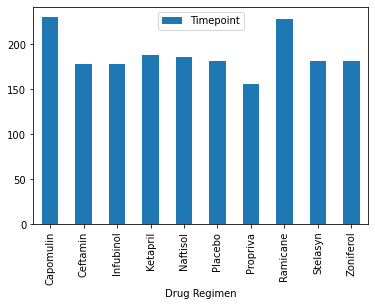

In [219]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
m_c = clean_df[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count()
#
m_c.plot.bar()

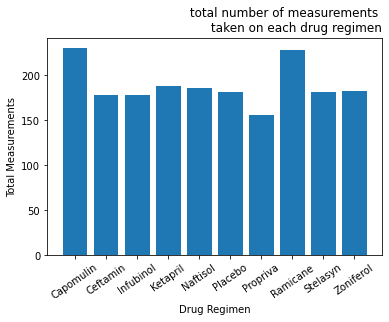

In [220]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
m_c = m_c.reset_index()
plt.bar(m_c['Drug Regimen'],m_c['Timepoint'])
plt.xticks(rotation=35)
plt.title(' total number of measurements \n taken on each drug regimen',loc='right')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Measurements')
plt.show()

array([<AxesSubplot:ylabel='Male vs Female'>], dtype=object)

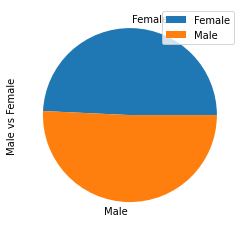

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ms_c = clean_df[['Sex','Mouse ID']].groupby('Sex').count()
#ms_c = ms_c.reset_index
ms_c.plot.pie(subplots=True,ylabel='Male vs Female')

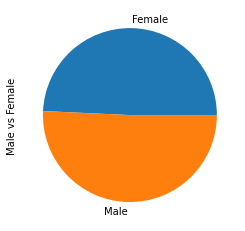

In [222]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ms_c = ms_c.reset_index()
plt.pie(ms_c['Mouse ID'],explode=None,labels=ms_c['Sex'])
plt.ylabel('Male vs Female')
plt.show()


## Quartiles, Outliers and Boxplots

In [223]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [224]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [225]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [226]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [227]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [228]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
